In [3]:
import pycaret

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.shape

(284807, 31)

In [5]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
df = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)

data_seen = df.sample(frac=0.5, random_state=42)      # Sample 10% of the data to become the unseen test set
df = df.drop(data_seen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
data_seen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (128163, 31)
Unseen Data For Predictions: (28481, 31)


In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [44]:
data_unseen.to_csv("../data/test.csv")

In [32]:
import mlflow

# If you wish to use a local folder to store the logs, prefic the full path with 'file:/' & use it
mlflow.set_tracking_uri()

In [9]:
from pycaret.classification import *

In [10]:
expt_intermediate = setup(
    data = data_seen, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    normalize=True,
    normalize_method="minmax",
    polynomial_features=True,
    trigonometry_features=True,
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.6,
    fix_imbalance=True,
    feature_selection=True,
    log_experiment=True,
    experiment_name='Credit Card Fraud - Expt 2',
    log_plots=True
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(128163, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
all_metrics = get_metrics()
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7fd0ebef7050>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x7fd0ebee9050>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7fd0ebef7560>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7fd0ebef78c0>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [13]:
best = compare_models(sort="F1", exclude=['svm','ridge','nb'], fold=5, n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9994,0.9648,0.7955,0.8427,0.8181,0.8178,0.8183,16.040
rf,Random Forest Classifier,0.9993,0.9667,0.7736,0.8440,0.8065,0.8062,0.8074,103.116
lightgbm,Light Gradient Boosting Machine,0.9991,0.9622,0.8009,0.7396,0.7681,0.7677,0.7687,5.810
dt,Decision Tree Classifier,0.9979,0.8419,0.6853,0.4449,0.5391,0.5381,0.5509,17.512
knn,K Neighbors Classifier,0.9967,0.8857,0.7569,0.3175,0.4469,0.4456,0.4887,106.854
gbc,Gradient Boosting Classifier,0.9945,0.9653,0.8563,0.2258,0.3570,0.3551,0.4377,277.014
qda,Quadratic Discriminant Analysis,0.9906,0.9450,0.8730,0.1461,0.2498,0.2475,0.3543,0.924
ada,Ada Boost Classifier,0.9907,0.9714,0.8616,0.1443,0.2470,0.2447,0.3502,50.722
lda,Linear Discriminant Analysis,0.9846,0.9796,0.8676,0.0924,0.1670,0.1643,0.2802,1.760
lr,Logistic Regression,0.9768,0.9786,0.8950,0.0645,0.1202,0.1173,0.2366,12.218


In [14]:
model_et = best[0]
tuned_et = tune_model(model_et, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9979,0.9611,0.7778,0.4375,0.5600,0.5590,0.5824
1,0.9984,0.9604,0.8056,0.5273,0.6374,0.6366,0.6510
2,0.9982,0.9854,0.8611,0.5000,0.6327,0.6318,0.6554
3,0.9978,0.9879,0.8333,0.4286,0.5660,0.5650,0.5967
4,0.9987,0.9799,0.8649,0.6038,0.7111,0.7105,0.7220
Mean,0.9982,0.9749,0.8285,0.4994,0.6214,0.6206,0.6415
SD,0.0004,0.0119,0.0332,0.0641,0.0553,0.0554,0.0495


In [15]:
model_rf = best[1]
tuned_rf = tune_model(model_rf, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9982,0.9670,0.8611,0.5000,0.6327,0.6318,0.6554
1,0.9986,0.9816,0.8056,0.5800,0.6744,0.6738,0.6829
2,0.9984,0.9955,0.9167,0.5238,0.6667,0.6659,0.6923
3,0.9983,0.9864,0.8611,0.5167,0.6458,0.6451,0.6663
4,0.9983,0.9911,0.8378,0.5254,0.6458,0.6450,0.6628
Mean,0.9984,0.9843,0.8565,0.5292,0.6531,0.6523,0.6719
SD,0.0001,0.0098,0.0363,0.0270,0.0152,0.0153,0.0136


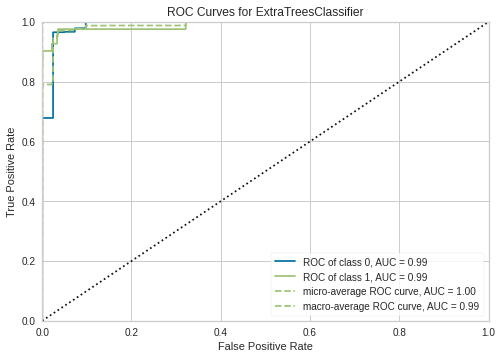

In [16]:
plot_model(tuned_et, 'auc')

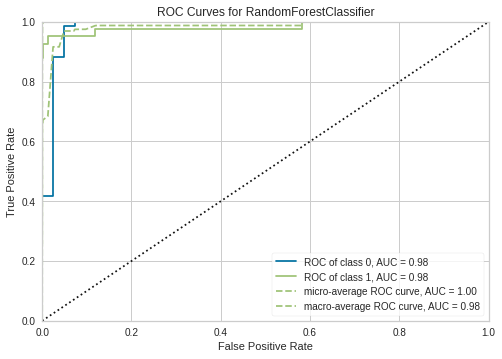

In [17]:
plot_model(tuned_rf, 'auc')

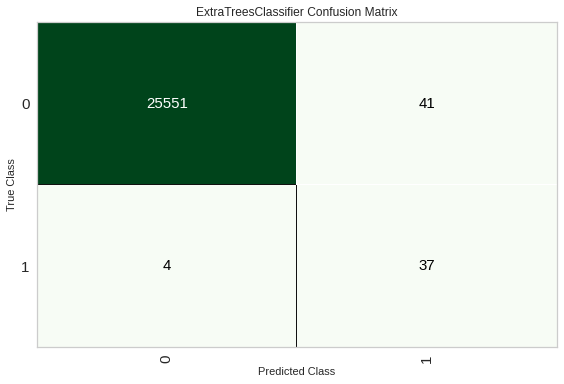

In [18]:
plot_model(tuned_et, 'confusion_matrix')

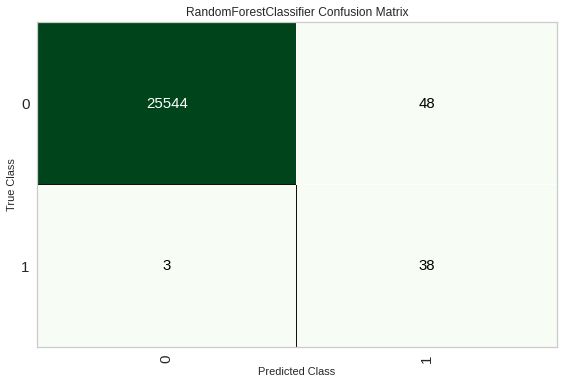

In [19]:
plot_model(tuned_rf, 'confusion_matrix')

In [22]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9982,0.9897,0.9024,0.4744,0.6218,0.6211,0.6536


,V21,V12,cos(V23),Time,V16,V20,V10,tan(V18),V15,V13,tan(V17),V3_Power2,V28_Power2,V18,cos(V12),V10_Power2,cos(V19),V25,Amount,V1,V14_Power2,V5,V6,V7_Power2,V3,V24,V4_Power2,sin(V28),V2,V26,V8,V28,V9,V7,V4,V11,V17,V22,cos(V10),V14,V23,V27,V19,Class,Label,Score
0,0.497971,0.848479,0.992151,0.398525,0.673548,0.508730,0.632908,0.520741,0.491562,0.499918,0.380395,0.000348,5.230547e-08,0.646499,0.647900,0.000006,0.982488,0.461585,0.000150,0.978140,0.000603,0.543509,0.530880,0.000008,0.900165,0.442690,0.000927,0.503870,0.793189,0.427593,0.718866,0.221454,0.505457,0.501149,0.276240,0.407082,0.761404,0.509245,0.999233,0.724262,0.503174,0.468527,0.429550,0,0,0.7463
1,0.514821,0.816399,0.851237,0.737100,0.657218,0.533472,0.634647,0.520772,0.407453,0.485457,0.380393,0.005610,2.708681e-05,0.746392,0.920658,0.000026,0.869522,0.417918,0.028758,0.936725,0.005018,0.564335,0.524645,0.001061,0.817490,0.434403,0.006907,0.412374,0.777846,0.309450,0.721619,0.217223,0.469742,0.518968,0.315553,0.301550,0.755533,0.579144,0.996440,0.756984,0.516834,0.475826,0.527386,0,0,0.7475
2,0.498447,0.816941,0.988325,0.941288,0.639529,0.509457,0.625634,0.520734,0.451448,0.432145,0.380396,0.006201,2.619720e-06,0.632103,0.917436,0.000083,0.988421,0.448907,0.004113,0.991457,0.000279,0.576153,0.608686,0.000233,0.814092,0.515508,0.002612,0.472621,0.784078,0.397144,0.729740,0.220015,0.560604,0.494924,0.215363,0.279970,0.765833,0.515777,0.988786,0.718723,0.504044,0.468608,0.476401,0,0,0.7754
3,0.504743,0.806612,0.999904,0.751973,0.660735,0.506589,0.642570,0.520752,0.405821,0.328963,0.380394,0.003514,6.488904e-06,0.683230,0.968354,0.000313,0.988504,0.466996,0.003050,0.992559,0.003803,0.551101,0.507497,0.000263,0.831292,0.426871,0.000265,0.456942,0.790617,0.518372,0.712520,0.219292,0.511491,0.510754,0.265668,0.350609,0.757251,0.561693,0.958385,0.750505,0.499666,0.462978,0.476326,0,0,0.7619
4,0.510208,0.798109,0.994693,0.854866,0.710761,0.512875,0.650068,0.520524,0.446344,0.593765,0.380400,0.000083,1.066468e-06,0.577678,0.992596,0.000874,0.990454,0.433965,0.004534,0.993177,0.001163,0.529934,0.517042,0.000547,0.875602,0.478526,0.001518,0.482526,0.780251,0.388835,0.714826,0.220472,0.515251,0.490838,0.224432,0.276369,0.780402,0.612618,0.886664,0.682804,0.502472,0.469856,0.474463,0,0,0.7481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25628,0.502153,0.819797,0.988350,0.449054,0.689555,0.508429,0.601320,0.520748,0.410654,0.650635,0.380392,0.001805,2.235735e-06,0.670894,0.899498,0.002270,0.957935,0.439170,0.002513,0.939940,0.000969,0.549960,0.556605,0.000021,0.921218,0.225826,0.001034,0.525294,0.798993,0.452891,0.727545,0.222440,0.525624,0.500318,0.229508,0.173748,0.753856,0.544946,0.723829,0.684905,0.494423,0.463494,0.415167,0,0,0.7411
25629,0.496409,0.822081,0.999974,0.834628,0.677101,0.510736,0.624832,0.520751,0.332987,0.464184,0.380390,0.000022,6.057949e-06,0.680762,0.884040,0.000108,0.969248,0.409402,0.000301,0.958905,0.000240,0.556221,0.525432,0.000592,0.887854,0.349282,0.002308,0.541606,0.800141,0.436969,0.717514,0.223192,0.504188,0.514830,0.217654,0.316990,0.746895,0.505457,0.985470,0.717859,0.499455,0.480826,0.489736,0,0,0.7817
25630,0.493662,0.821757,0.997508,0.411987,0.623695,0.505267,0.625944,0.520737,0.223564,0.182754,0.380404,0.001584,3.610443e-07,0.638759,0.886290,0.000075,0.961935,0.480418,0.002857,0.975010,0.000053,0.535350,0.552935,0.000393,0.918845,0.434455,0.010554,0.510168,0.786802,0.312453,0.725387,0.221744,0.576283,0.492637,0.330202,0.317906,0.793280,0.492195,0.989955,0.701769,0.501451,0.472621,0.493649,0,0,0.7401
25631,0.503812,0.807407,0.881659,0.260012,0.595115,0.533671,0.643185,0.520821,0.381251,0.400638,0.380399,0.000516,1.480208e-05,0.787277,0.965249,0.000348,0.937221,0.457968,0.069089,0.954571,0.000905,0.524107,0.525229,0.000369,0.863613,0.498929,0.000089,0.564928,0.757274,0.589383,0.713298,0.224272,0.467815,0

In [21]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.998,0.9824,0.9268,0.4419,0.5984,0.5976,0.6392


,V21,V12,cos(V23),Time,V16,V20,V10,tan(V18),V15,V13,tan(V17),V3_Power2,V28_Power2,V18,cos(V12),V10_Power2,cos(V19),V25,Amount,V1,V14_Power2,V5,V6,V7_Power2,V3,V24,V4_Power2,sin(V28),V2,V26,V8,V28,V9,V7,V4,V11,V17,V22,cos(V10),V14,V23,V27,V19,Class,Label,Score
0,0.497971,0.848479,0.992151,0.398525,0.673548,0.508730,0.632908,0.520741,0.491562,0.499918,0.380395,0.000348,5.230547e-08,0.646499,0.647900,0.000006,0.982488,0.461585,0.000150,0.978140,0.000603,0.543509,0.530880,0.000008,0.900165,0.442690,0.000927,0.503870,0.793189,0.427593,0.718866,0.221454,0.505457,0.501149,0.276240,0.407082,0.761404,0.509245,0.999233,0.724262,0.503174,0.468527,0.429550,0,0,0.9988
1,0.514821,0.816399,0.851237,0.737100,0.657218,0.533472,0.634647,0.520772,0.407453,0.485457,0.380393,0.005610,2.708681e-05,0.746392,0.920658,0.000026,0.869522,0.417918,0.028758,0.936725,0.005018,0.564335,0.524645,0.001061,0.817490,0.434403,0.006907,0.412374,0.777846,0.309450,0.721619,0.217223,0.469742,0.518968,0.315553,0.301550,0.755533,0.579144,0.996440,0.756984,0.516834,0.475826,0.527386,0,0,0.9508
2,0.498447,0.816941,0.988325,0.941288,0.639529,0.509457,0.625634,0.520734,0.451448,0.432145,0.380396,0.006201,2.619720e-06,0.632103,0.917436,0.000083,0.988421,0.448907,0.004113,0.991457,0.000279,0.576153,0.608686,0.000233,0.814092,0.515508,0.002612,0.472621,0.784078,0.397144,0.729740,0.220015,0.560604,0.494924,0.215363,0.279970,0.765833,0.515777,0.988786,0.718723,0.504044,0.468608,0.476401,0,0,0.9989
3,0.504743,0.806612,0.999904,0.751973,0.660735,0.506589,0.642570,0.520752,0.405821,0.328963,0.380394,0.003514,6.488904e-06,0.683230,0.968354,0.000313,0.988504,0.466996,0.003050,0.992559,0.003803,0.551101,0.507497,0.000263,0.831292,0.426871,0.000265,0.456942,0.790617,0.518372,0.712520,0.219292,0.511491,0.510754,0.265668,0.350609,0.757251,0.561693,0.958385,0.750505,0.499666,0.462978,0.476326,0,0,0.9932
4,0.510208,0.798109,0.994693,0.854866,0.710761,0.512875,0.650068,0.520524,0.446344,0.593765,0.380400,0.000083,1.066468e-06,0.577678,0.992596,0.000874,0.990454,0.433965,0.004534,0.993177,0.001163,0.529934,0.517042,0.000547,0.875602,0.478526,0.001518,0.482526,0.780251,0.388835,0.714826,0.220472,0.515251,0.490838,0.224432,0.276369,0.780402,0.612618,0.886664,0.682804,0.502472,0.469856,0.474463,0,0,0.9976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25628,0.502153,0.819797,0.988350,0.449054,0.689555,0.508429,0.601320,0.520748,0.410654,0.650635,0.380392,0.001805,2.235735e-06,0.670894,0.899498,0.002270,0.957935,0.439170,0.002513,0.939940,0.000969,0.549960,0.556605,0.000021,0.921218,0.225826,0.001034,0.525294,0.798993,0.452891,0.727545,0.222440,0.525624,0.500318,0.229508,0.173748,0.753856,0.544946,0.723829,0.684905,0.494423,0.463494,0.415167,0,0,0.9946
25629,0.496409,0.822081,0.999974,0.834628,0.677101,0.510736,0.624832,0.520751,0.332987,0.464184,0.380390,0.000022,6.057949e-06,0.680762,0.884040,0.000108,0.969248,0.409402,0.000301,0.958905,0.000240,0.556221,0.525432,0.000592,0.887854,0.349282,0.002308,0.541606,0.800141,0.436969,0.717514,0.223192,0.504188,0.514830,0.217654,0.316990,0.746895,0.505457,0.985470,0.717859,0.499455,0.480826,0.489736,0,0,0.9985
25630,0.493662,0.821757,0.997508,0.411987,0.623695,0.505267,0.625944,0.520737,0.223564,0.182754,0.380404,0.001584,3.610443e-07,0.638759,0.886290,0.000075,0.961935,0.480418,0.002857,0.975010,0.000053,0.535350,0.552935,0.000393,0.918845,0.434455,0.010554,0.510168,0.786802,0.312453,0.725387,0.221744,0.576283,0.492637,0.330202,0.317906,0.793280,0.492195,0.989955,0.701769,0.501451,0.472621,0.493649,0,0,0.9831
25631,0.503812,0.807407,0.881659,0.260012,0.595115,0.533671,0.643185,0.520821,0.381251,0.400638,0.380399,0.000516,1.480208e-05,0.787277,0.965249,0.000348,0.937221,0.457968,0.069089,0.954571,0.000905,0.524107,0.525229,0.000369,0.863613,0.498929,0.000089,0.564928,0.757274,0.589383,0.713298,0.224272,0.467815,0

In [23]:
final_et = finalize_model(tuned_et)
final_rf = finalize_model(tuned_rf)

In [29]:
deploy_model(model = final_et, model_name = 'et_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsdvc180070023'})

Model Successfully Deployed on AWS S3


In [30]:
deploy_model(model = final_rf, model_name = 'rf_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsdvc180070023'})

Model Successfully Deployed on AWS S3
